# First Sip of Caffe

This is a quick check to make sure we can brew.

---
Before we begin, let's verify [WebSockets](http://en.wikipedia.org/wiki/WebSocket) are working on your system.  To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Ctrl-Enter, or pressing the play button in the toolbar above.  If all goes well, you should see some output returned below the grey cell.  If not, please consult the [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue. *This section courtesy the NVIDIA Caffe introduction.*

In [9]:
print "The answer should be three: " + str(1+2)

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [10]:
!nvidia-smi

Mon Feb 15 18:09:22 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Graphics Device     On   | 0000:01:00.0     Off |                  N/A |
| 27%   66C    P2    74W / 250W |   2760MiB / 12287MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Graphics Device     On   | 0000:02:00.0     Off |                  N/A |
| 22%   42C    P8    14W / 250W |     24MiB / 12287MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

Now load the `caffe` Python module and switch to GPU mode for computation.

In [11]:
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)

# make sure that caffe is in our import path
import sys
sys.path.insert(0, caffe_root + 'python')

# load caffe and switch to the GPU
import caffe
caffe.set_mode_gpu()
caffe.set_device(0)

# import standard array and plotting toolkit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next step is to collect the materials we'll need for our first sip:

1. a pre-trained network for off-the-shelf use
2. the category names to understand the output

In [12]:
# make sure we have the CaffeNet model weights
import os
if os.path.isfile(caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'):
    print 'CaffeNet found.'
else:
    print 'Downloading pre-trained CaffeNet model...'
    !../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

# load ImageNet labels (for understanding the output)
labels_file = caffe_root + 'data/ilsvrc12/synset_words.txt'
if not os.path.exists(labels_file):
    !../data/ilsvrc12/get_ilsvrc_aux.sh
labels = np.loadtxt(labels_file, str, delimiter='\t')

CaffeNet found.


With `caffe` ready, let's load our pre-trained CaffeNet (a variant of the ILSVRC2012-winning AlexNet by Krizhevsky et al.).

In [13]:
# load and run the net
model_def = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # for deployment (in contrast to caffe.TRAIN)

print 'Loaded net.'

Loaded net.


Before checking the net let's define an input pre-processor, `transformer`, to help feed an image into the net.

In [14]:
# configure input pre-processing
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR
print 'Configured input.'

Configured input.


Time for an image:

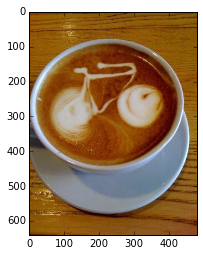

In [15]:
# download an image
image = caffe.io.load_image(caffe_root + 'examples/images/coffee.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

What a fine cup of coffee. Let's classify!

In [16]:
net.blobs['data'].data[...] = transformed_image
net.forward()
output_prob = net.blobs['prob'].data[0]

print 'What does the net say?\n', labels[output_prob.argmax()]

What does the net say?
n07920052 espresso


Happy brewing!